In [1]:
# timeit
# Kamille Andrea Lapus Galura
# Cohort 2 - Haight

<h3>Analysis for Apprentice Chef, Inc.'s cross-selling promotion - Halfway There</h3>

Current meal plan subscribers exclusively receive a half bottle of wine from a local California
vineyard every Wednesday. The company would like to promote this service to a wider audience not 
just to the current database provided. As the analyst assigned for this project: 

The top insights are:   
A. The relationship of cross-sell success with tastes and preferences is the strongest. Stemming from the insights on what the customers shared, Apprentice Chef already has a good gauge what beverages customers prefer to drink with their chosen meal plan. The promotion works well since the millennial and generation X markets are 321% more likely to purchase a subscription, according to Nielsen (2017). The behavior of choosing convenience and health while being indulgent is a plus for families with children in our target market. The high percentage of customers following the meal recommendation generated for them supports the insights captured. 
B. The number of unique meal sets ordered by the customer is the second weakest relationship with cross-sell success with a p value of 0.989. According to Deloitte (2019), “shifting preferences are transforming consumption” and family time is seen as increasingly important even if it’s cooking at home. The unique meal sets show the demand for variety, high quality and healthy ingredients with a bonus of the Halfway There wine. This is a unique insight to look into since the data generated is lacking patterns and trends of which wines customers prefer to pair with their meals. 

The variables not needed are: Name, Email, First Name, Family Name, Package Locker, Refrigerated Locker and Average Prep Video Time 

The assumptions made are: the dataset captured accurate data 

The limitations of the analysis are: limited external quantitative and qualitative data  

The best machine learning model to predict which customers will subscribe to this service is KNN Classification with an AUC score of 0.79 

In [2]:
# importing libraries
import numpy as np  # mathematical essentials
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import statsmodels.formula.api as smf
import random            as rand                     # random number gen
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects


# new packages
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


# loading data
chef = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
chef.head(n = 5)

C:\Users\areag\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,MOBILE_LOGINS,PC_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,86.00,1,2,1,0,6,2,8,0,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,125.60,1,0,1,0,6,1,8,0,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,58.00,1,5,0,1,6,2,14,0,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,45.51,0,3,0,1,6,1,11,5,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,106.00,1,1,1,0,6,2,12,0,4,1,0,90,135.3,3,1,3,13,253


In [3]:
# user-defined functions
# mv_flagger

def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df

# text_split_feature

def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [4]:
# pulling up data dictionary
chef_description = pd.read_excel('Apprentice_Chef_Data_Dictionary.xlsx')


# displaying the data dictionary
chef_description

,Column,Data Type,Description
0,REVENUE,Float,Total revenue generated from the customer
1,CROSS_SELL_SUCCESS,Integer,Success of promoting Halfway There
2,NAME,string,Full name of customer
3,EMAIL,string,Email of customer
4,FIRST_NAME,string,First name
5,FAMILY_NAME,string,Last name
6,TOTAL_MEALS_ORDERED,Integer,The total amount of meals orderd by the customer up to day
7,UNIQUE_MEALS_PURCH,Integer,Number of uniqe meal sets ordered by the customer
8,CONTACTS_W_CUSTOMER_SERVICE,Integer,Number of times customer was in contact with customer service
9,PRODUCT_CATEGORIES_VIEWED,Integer,Total number of meal categories viewed


In [5]:
# saving results
chef.to_excel('Apprentice_Chef_feature_rich.xlsx',
                 index = False)

In [6]:
# loading saved file
chef = pd.read_excel('Apprentice_Chef_feature_rich.xlsx')

<h3>Dropping categorical variables that are non-numeric and therefore unnecessary for this analysis:</h3>
1. Name
2. Email
3. First Name
4. Family Name

In [7]:
# dropping categorical variables after they've been encoded
chef = chef.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)


# checking the results
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [8]:
# saving results
chef.to_excel('Apprentice_Chef_feature_rich.xlsx',
                 index = False)

In [9]:
# loading saved file
chef = pd.read_excel('Apprentice_Chef_feature_rich.xlsx')

In [10]:
# checking for missing values
chef.isnull().sum()

REVENUE                         0
CROSS_SELL_SUCCESS              0
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
MOBILE_LOGINS                   0
PC_LOGINS                       0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
FOLLOWED_RECOMMENDATIONS_PCT    0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [11]:
# saving results
chef.to_excel('Apprentice_Chef_feature_rich.xlsx',
                 index = False)

In [12]:
# loading saved file
chef = pd.read_excel('Apprentice_Chef_feature_rich.xlsx')

In [13]:
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
PC_LOGINS                       1946 non-null int64
WEEKLY_PLAN                     1946 non-null int64
EARLY_DELIVERIES                1946 non-null int64
LATE_DELIVERIES                 1946 non-null int64
PACKAGE_LOCKER                  1946 non-null int64
REFRI

In [14]:
# saving results
chef.to_excel('Apprentice_Chef_feature_rich.xlsx',
                 index = False)

In [15]:
# loading saved file
chef = pd.read_excel('Apprentice_Chef_feature_rich.xlsx')

<h3>Dropping categorical variables that are numeric but unnecessary for the analysis with cross-sell success:</h3>
1. Package Locker
2. Refrigerated Locker
3. Average Prep Video Time 

*These dropped variables are assumed to not have a direct effect with the cross-selling success and revenue.

Remaining variables that were deemed necessary for further cross-analysis with cross-selling success:
1. Revenue
2. Total meals ordered
3. Unique meals purchased
4. Contacts with customer service
5. Product categories viewed
6. Average time per site visit 
7. Mobile number
8. Cancellations before noon
9. Cancellations after noon
10. Tastes and preferences
11. Mobile Logins
12. PC Logins
13. Weekly Plan
14. Early Deliveries
15. Late Deliveries
16. Followed recommendations 
17. Largest order size
18. Master classes attended 
19. Median meal rating
20. Average clicks per visit
21. Total photos viewed 

*The remaining variables assumed to have a direct effect is based on outside research and the analyst's personal take as a consumer.


In [16]:
# dropping categorical variables after they've been encoded
chef = chef.drop(['PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME'], axis = 1)


# checking the results
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'FOLLOWED_RECOMMENDATIONS_PCT', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')

In [17]:
# saving results
chef.to_excel('Apprentice_Chef_feature_rich.xlsx',
                 index = False)

In [18]:
# loading saved file
chef = pd.read_excel('Apprentice_Chef_feature_rich.xlsx')

<h3>*NOTE:</h3>
Feature engineering was deleted in this analysis since it resulted in 
very low correlation and p values with cross-sell success


In [19]:
# generate the Pearson correlations between the response variable and the explanatory variables
df_corr = chef.corr().round(2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = True)

PC_LOGINS                      -0.05
CANCELLATIONS_AFTER_NOON       -0.05
AVG_CLICKS_PER_VISIT           -0.04
WEEKLY_PLAN                    -0.01
REVENUE                         0.00
UNIQUE_MEALS_PURCH              0.00
PRODUCT_CATEGORIES_VIEWED       0.00
LATE_DELIVERIES                 0.01
TOTAL_PHOTOS_VIEWED             0.01
AVG_TIME_PER_SITE_VISIT         0.01
TOTAL_MEALS_ORDERED             0.01
EARLY_DELIVERIES                0.02
LARGEST_ORDER_SIZE              0.02
MEDIAN_MEAL_RATING              0.03
MOBILE_LOGINS                   0.04
CONTACTS_W_CUSTOMER_SERVICE     0.04
MASTER_CLASSES_ATTENDED         0.04
TASTES_AND_PREFERENCES          0.08
MOBILE_NUMBER                   0.10
CANCELLATIONS_BEFORE_NOON       0.16
FOLLOWED_RECOMMENDATIONS_PCT    0.46
CROSS_SELL_SUCCESS              1.00
Name: CROSS_SELL_SUCCESS, dtype: float64

In [20]:
# declaring explanatory variables
chef_data = chef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

In [21]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 222,
            stratify = chef_target)


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

In [22]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula = """CROSS_SELL_SUCCESS ~ REVENUE""",
                           data    = chef_train)


# fitting the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.627712
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1457
Method:                           MLE   Df Model:                            1
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:               0.0003948
Time:                        17:52:55   Log-Likelihood:                -915.83
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                    0.3950
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6565      0.120      5.449      0.000       0.420       0.893
REVENUE     4.385e-05   5.18e-05      0.846      0.398   -5.77e-05       0.000
==============================================================================
"""

In [23]:
# build a logistic regression model in statsmodels
for val in chef_data:
    print(f"{val} +")

REVENUE +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
MOBILE_LOGINS +
PC_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
FOLLOWED_RECOMMENDATIONS_PCT +
LARGEST_ORDER_SIZE +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +


In [24]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                        REVENUE +
                                        TOTAL_MEALS_ORDERED +
                                        UNIQUE_MEALS_PURCH +
                                        CONTACTS_W_CUSTOMER_SERVICE +
                                        PRODUCT_CATEGORIES_VIEWED +
                                        AVG_TIME_PER_SITE_VISIT +
                                        MOBILE_NUMBER +
                                        CANCELLATIONS_BEFORE_NOON +
                                        CANCELLATIONS_AFTER_NOON +
                                        TASTES_AND_PREFERENCES +
                                        MOBILE_LOGINS +
                                        PC_LOGINS +
                                        WEEKLY_PLAN +
                                        EARLY_DELIVERIES +
                                        LATE_DELIVERIES +
                                        FOLLOWED_RECOMMENDATIONS_PCT +
                                        LARGEST_ORDER_SIZE +
                                        MASTER_CLASSES_ATTENDED +
                                        MEDIAN_MEAL_RATING +
                                        AVG_CLICKS_PER_VISIT +
                                        TOTAL_PHOTOS_VIEWED""",
                                        data    = chef_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.470182
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1437
Method:                           MLE   Df Model:                           21
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:                  0.2513
Time:                        17:52:56   Log-Likelihood:                -686.00
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 2.691e-84
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.5593      1.451     -0.385      0.700      -3.403       2.285
REVENUE                         -0.0001   9.71e-05     -1.089      0.276      -0.000    8.45e-05
TOTAL_MEALS_ORDERED              0.0015      0.002      0.944      0.345      -0.002       0.005
UNIQUE_MEALS_PURCH               0.0037      0.028      0.134      0.893      -0.051       0.058
CONTACTS_W_CUSTOMER_SERVICE     -0.0032      0.030     -0.109      0.913      -0.061       0.055
PRODUCT_CATEGORIES_VIEWED        0.0028      0.022      0.126      0.900      -0.040       0.046
AVG_TIME_PER_SITE_VISIT          0.0013      0.001      1.212      0.225      -0.001       0.003
MOBILE_NUMBER                    0.7215      0.197      3.670      0.000       0.336       1.107
CANCELLATIONS_BEFORE_NOON        0.2449      0.048      5.091      0.000       0.151       0.339
CANCELLATIONS_AFTER_NOON        -0.2273      0.150     -1.518      0.129      -0.521       0.066
TASTES_AND_PREFERENCES           0.3360      0.145      2.318      0.020       0.052       0.620
MOBILE_LOGINS                    0.0760      0.113      0.675      0.500      -0.145       0.297
PC_LOGINS                       -0.3306      0.125     -2.651      0.008      -0.575      -0.086
WEEKLY_PLAN                      0.0025      0.005      0.516      0.606      -0.007       0.012
EARLY_DELIVERIES                 0.0418      0.030      1.400      0.161      -0.017       0.100
LATE_DELIVERIES                  0.0320      0.024      1.317      0.188      -0.016       0.080
FOLLOWED_RECOMMENDATIONS_PCT     0.0572      0.004     15.056      0.000       0.050       0.065
LARGEST_ORDER_SIZE               0.0275      0.050      0.555      0.579      -0.070       0.125
MASTER_CLASSES_ATTENDED          0.1482      0.120      1.234      0.217      -0.087       0.384
MEDIAN_MEAL_RATING              -0.1592      0.180     -0.882      0.378      -0.513       0.195
AVG_CLICKS_PER_VISIT            -0.1013      0.055     -1.838      0.066      -0.209       0.007
TOTAL_PHOTOS_VIEWED              0.0001      0.000      0.257      0.797      -0.001       0.001
================================================================================================
"""

In [25]:
# optimal_neighbors

def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=222,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<h3>Significant variables chosen have a p value of < .05 in relation to cross-sell success:</h3>
1. Mobile Number
2. Cancellations before noon
3. Cancellations after noon
4. Tastes and preferences
5. Followed recommendations 

In [26]:
#  Logistic Regression in scikit-learn

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE', 'TOTAL_MEALS_ORDERED',
                   'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                   'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT',
                   'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                   'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN','EARLY_DELIVERIES',
                   'LATE_DELIVERIES', 'FOLLOWED_RECOMMENDATIONS_PCT', 
                   'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
                   'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
 
 # significant variables only
 'logit_sig'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
                   'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES',
                  'FOLLOWED_RECOMMENDATIONS_PCT']

}

In [27]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


Significant p-value Model:
--------------------------
{candidate_dict['logit_sig']}
""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'MOBILE_LOGINS', 'PC_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'FOLLOWED_RECOMMENDATIONS_PCT', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED']


Significant p-value Model:
--------------------------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'FOLLOWED_RECOMMENDATIONS_PCT']



In [28]:
# Regression v. Classification in scikit-learn

# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(2))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(2))

Training ACCURACY: 0.71
Testing  ACCURACY: 0.71


In [29]:
# Confusion Matrix

# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 85  71]
 [ 69 262]]


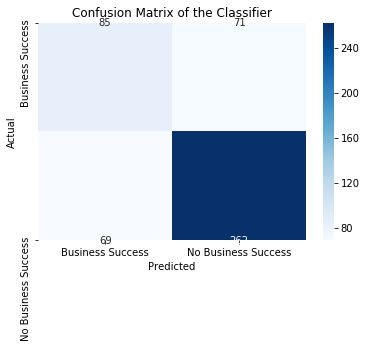

In [30]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Business Success', 'No Business Success'])

In [31]:
# Area Under The Curve (AUC)

# area under the roc curve (auc)
roc_auc_score(y_true  = y_test,
              y_score = logreg_pred)

0.6682062901851422

In [32]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]


# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(2)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(2)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(2)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.71, 0.71, 0.67]


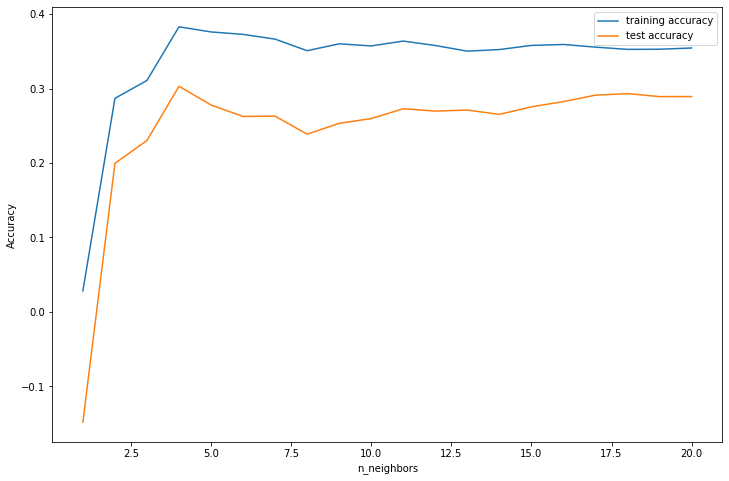

The optimal number of neighbors is: 4


In [33]:
# Optimal Neighbors

# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train)

In [34]:
# Scale the explanatory data and build a KNN classification model

# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            chef_target,
            random_state = 222,
            test_size = 0.25,
            stratify = chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(2))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(2))

Training ACCURACY: 0.78
Testing  ACCURACY: 0.77
AUC Score        : 0.79


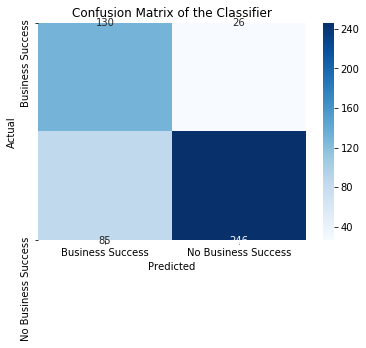

In [35]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Business Success', 'No Business Success'])

In [36]:
# Save the KNN model's performance

# train accuracy
knn_train_acc = knn_fit.score(X_train_scaled, y_train_scaled).round(2)


# test accuracy
knn_test_acc  = knn_fit.score(X_test_scaled, y_test_scaled).round(2)


# auc value
knn_auc       = roc_auc_score(y_true  = y_test_scaled,
                              y_score = knn_pred).round(2)


# saving the results
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.71, 0.71, 0.67]
['KNN Classification', 0.78, 0.77, 0.79]


In [37]:
# Classification Trees (CART Models)

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

In [38]:
# display_tree

def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

# plot_feature_importances

def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [39]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', full_tree_fit.score(X_train, y_train).round(2))
print('Testing  ACCURACY:', full_tree_fit.score(X_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pred).round(2))

Training ACCURACY: 0.82
Testing  ACCURACY: 0.76
AUC Score        : 0.77


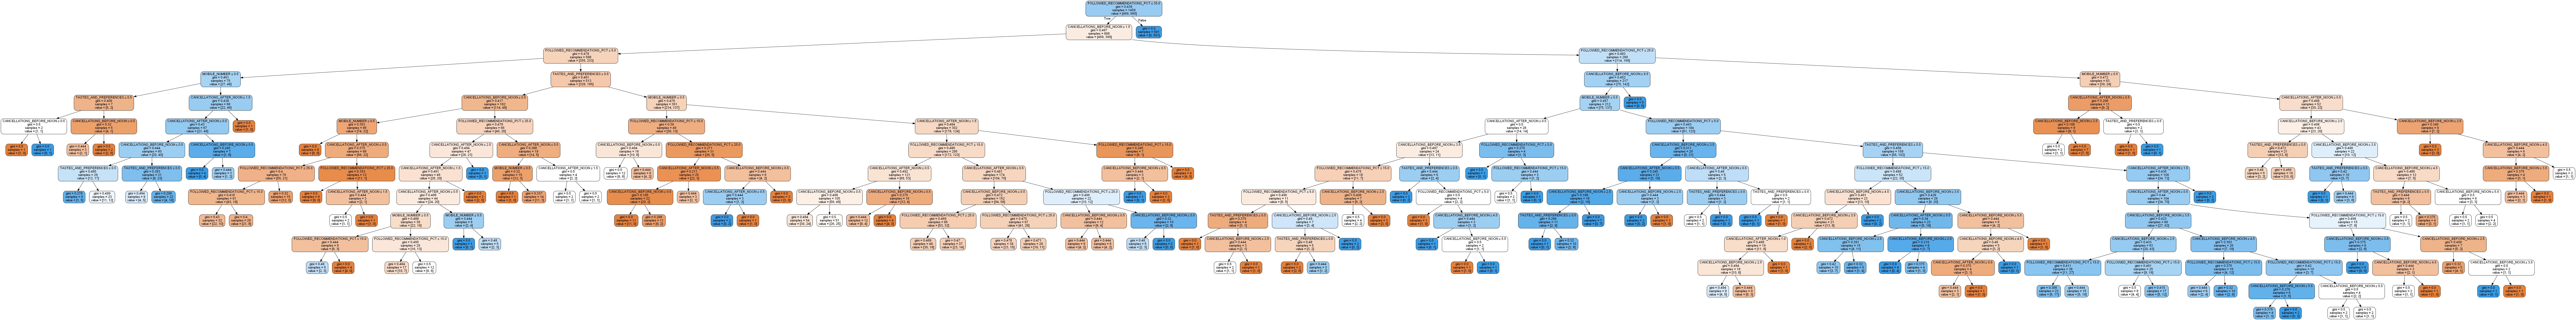

In [40]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = X_train)

In [41]:
# train accuracy
full_tree_train_acc = full_tree_fit.score(X_train, y_train).round(2)


# test accuracy
full_tree_test_acc  = full_tree_fit.score(X_test, y_test).round(2)


# auc value
full_tree_auc       = roc_auc_score(y_true  = y_test,
                                    y_score = full_tree_pred).round(2)


# saving the results
model_performance.append(['Full Tree',
                          full_tree_train_acc,
                          full_tree_test_acc,
                          full_tree_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Logistic Regression', 0.71, 0.71, 0.67]
['KNN Classification', 0.78, 0.77, 0.79]
['Full Tree', 0.82, 0.76, 0.77]


In [42]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

Training ACCURACY: 0.79
Testing  ACCURACY: 0.77
AUC Score        : 0.76


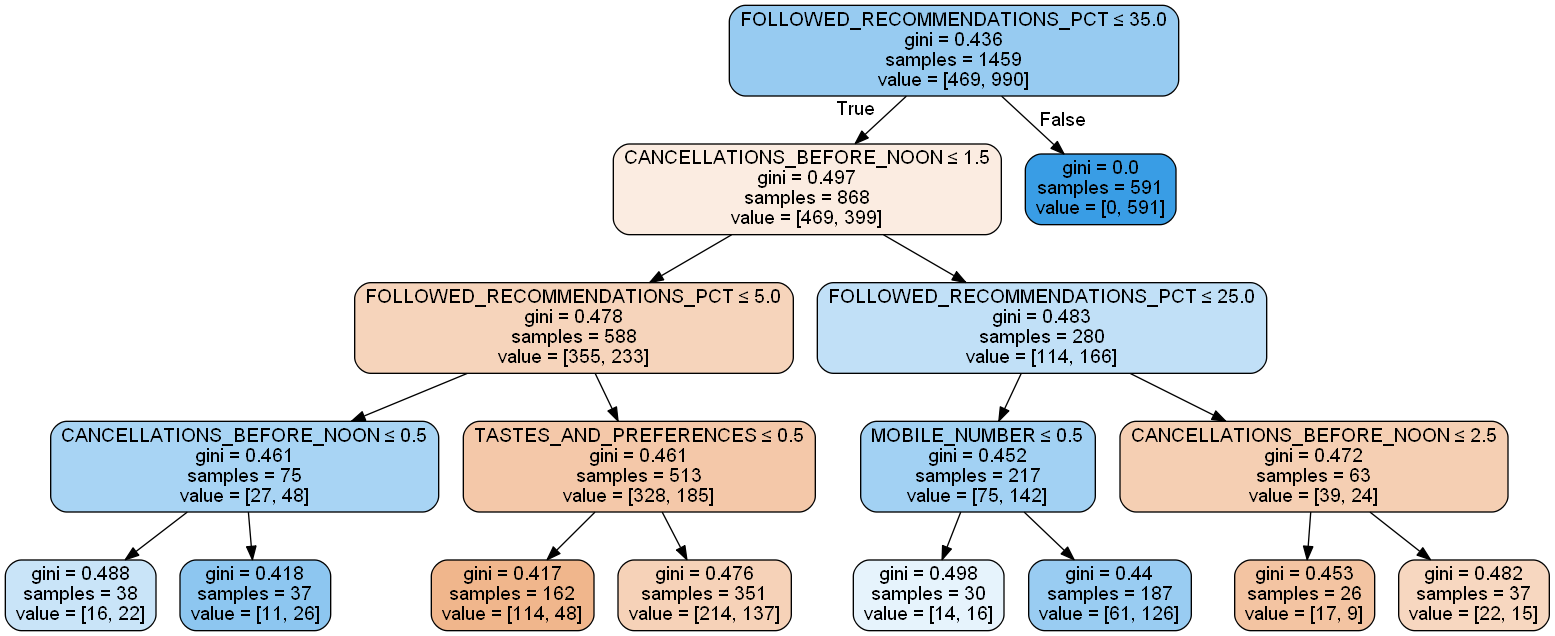

In [43]:
# INSTANTIATING a classification tree object
tree_pruned      = DecisionTreeClassifier(max_depth = 4,
                                          min_samples_leaf = 25,
                                          random_state = 222)


# FITTING the training data
tree_pruned_fit  = tree_pruned.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(2))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(2))


# calling display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)

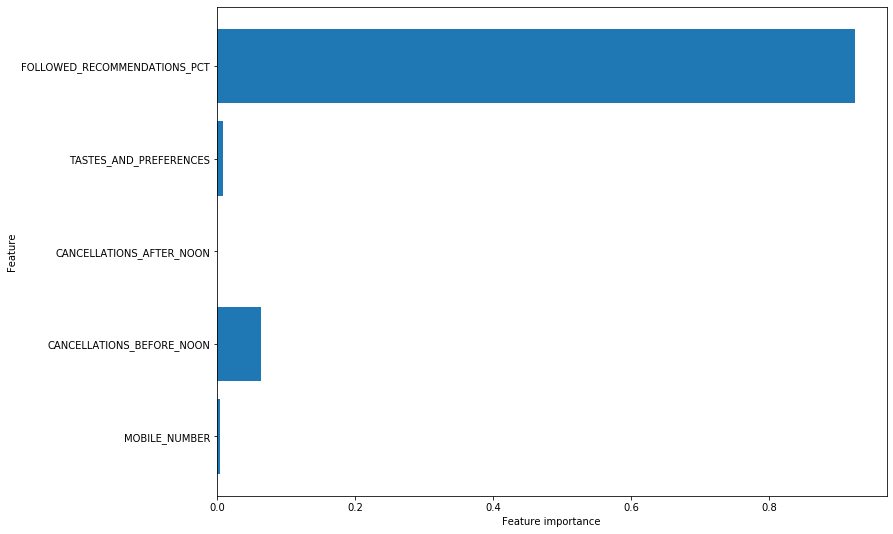

In [44]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train = X_train,
                         export = False)

In [45]:
# train accuracy
p_tree_train_acc = tree_pruned_fit.score(X_train, y_train).round(2)


# test accuracy
p_tree_test_acc  = tree_pruned_fit.score(X_test, y_test).round(2)


# auc value
p_tree_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = tree_pred).round(2)


# saving the results
model_performance.append(['Pruned Tree',
                          p_tree_train_acc,
                          p_tree_test_acc,
                          p_tree_auc])


# converting to DataFrame and checking the results
pd.DataFrame(model_performance[1:], columns = model_performance[0])

,Model,Training Accuracy,Testing Accuracy,AUC Value
0,Logistic Regression,0.71,0.71,0.67
1,KNN Classification,0.78,0.77,0.79
2,Full Tree,0.82,0.76,0.77
3,Pruned Tree,0.79,0.77,0.76


In [46]:
# declaring a DataFrame object
model_performance_df = pd.DataFrame(model_performance[1:], columns = model_performance[0])


# saving the DataFrame to Excel
model_performance_df.to_excel('Classification Model Performance.xlsx',
                              index = False)

<h3>HYPERPARAMETER</h3>

In [47]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800, export = False):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    export     : bool, defalut False
        whether or not to export the tree as a .png file
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width,
                unconfined = True)


    return img

In [48]:
# train/test split with the logit_sig variables
chef_data   =  chef.loc[ : , candidate_dict['logit_sig']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 222,
            test_size    = 0.25,
            stratify     = chef_target)

In [49]:
# Hyperparameter Tuning - Tuned Logistic Regression 

# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 222)

In [50]:
# FITTING the training data
lr_default_fit = lr_default.fit(X_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))

Training ACCURACY: 0.7094
Testing  ACCURACY: 0.7125
AUC Score        : 0.6682


In [51]:
########################################
# GridSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              random_state = 222)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned,
                           param_grid = param_grid,
                           cv         = 3,
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

Tuned Parameters  : {'C': 0.5, 'warm_start': True}
Tuned CV AUC      : 0.5674


In [52]:
lr_tuned_cv.cv_results_

{'mean_fit_time': array([0.04328918, 0.03300603, 0.03719393, 0.03256838, 0.03407812,
        0.03676454, 0.03183158, 0.03363482, 0.03452754, 0.03426735,
        0.03301485, 0.03432004, 0.03485314, 0.02851073, 0.03792922,
        0.03140879, 0.03311308, 0.0376788 , 0.03467226, 0.02865879,
        0.03407017, 0.03128688, 0.02810017, 0.03485664, 0.03045416,
        0.03950834, 0.04541055, 0.03951208, 0.03702354, 0.03454073,
        0.0350949 , 0.03560487, 0.03766211, 0.03593922, 0.0362792 ,
        0.03400469, 0.03379718, 0.03279344, 0.0285364 , 0.03184756,
        0.03201127, 0.0415717 , 0.03659455, 0.03335865, 0.03853718,
        0.03436049, 0.03356171, 0.03802697, 0.03201119, 0.04155652,
        0.04145718, 0.0400935 , 0.0347387 , 0.04269989, 0.0387315 ,
        0.03631528, 0.03355567, 0.04094315]),
 'std_fit_time': array([0.00918327, 0.0060748 , 0.00288726, 0.0014095 , 0.00801913,
        0.00331355, 0.0030587 , 0.00602832, 0.00633256, 0.00904321,
        0.01083277, 0.00398859, 0.004

In [53]:
lr_tuned_cv.best_estimator_

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=222, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=True)

In [54]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))

Training ACCURACY: 0.7114
Testing  ACCURACY: 0.7084
AUC Score        : 0.6618


In [55]:
# train accuracy
lr_train_acc = lr_tuned.score(X_train, y_train).round(2)
# test accuracy
lr_test_acc  = lr_tuned.score(X_test, y_test).round(2)
# auc value
lr_auc       = roc_auc_score(y_true  = y_test,
                                 y_score = lr_tuned_pred).round(2)


# appending to model_performance
model_performance.append(['Tuned LR',
                          lr_train_acc,
                          lr_test_acc,
                          lr_auc])



# checking the results
model_performance

[['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value'],
 ['Logistic Regression', 0.71, 0.71, 0.67],
 ['KNN Classification', 0.78, 0.77, 0.79],
 ['Full Tree', 0.82, 0.76, 0.77],
 ['Pruned Tree', 0.79, 0.77, 0.76],
 ['Tuned LR', 0.71, 0.71, 0.66]]

In [56]:
# Hyperparameter Tuning - Random Forest

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 222)

In [57]:
# FITTING the training data
rf_default_fit = rf_default.fit(X_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(2))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(2))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(2))

Training ACCURACY: 0.82
Testing  ACCURACY: 0.76
AUC Score        : 0.75


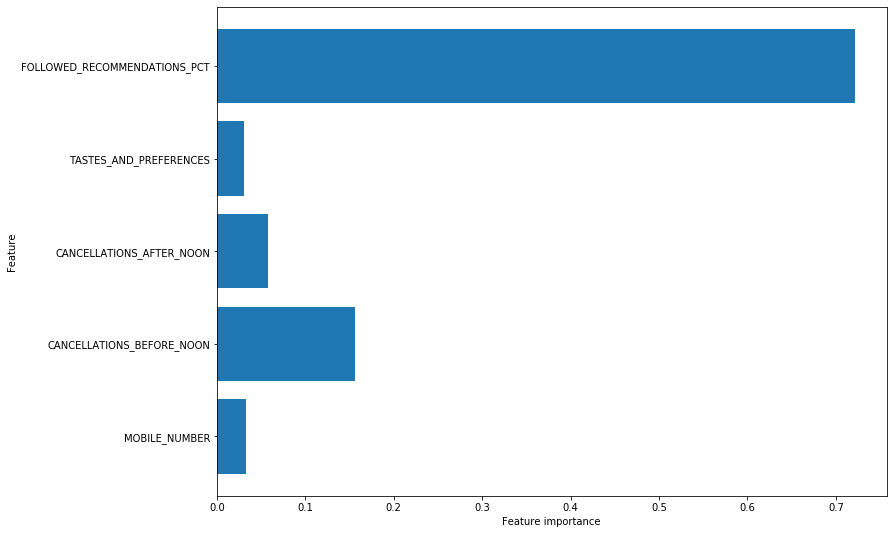

In [58]:
# plotting feature importance
plot_feature_importances(model = rf_default, 
                         train = X_train, 
                         export = False)

In [59]:
# train accuracy
rf_train_acc = rf_default_fit.score(X_train, y_train).round(2)
# test accuracy
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(2)
# auc value
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(2)


# appending to model_performance
model_performance.append(['Random Forest',
                          rf_train_acc,
                          rf_test_acc,
                          rf_auc])


# checking the results
model_performance

[['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value'],
 ['Logistic Regression', 0.71, 0.71, 0.67],
 ['KNN Classification', 0.78, 0.77, 0.79],
 ['Full Tree', 0.82, 0.76, 0.77],
 ['Pruned Tree', 0.79, 0.77, 0.76],
 ['Tuned LR', 0.71, 0.71, 0.66],
 ['Random Forest', 0.82, 0.76, 0.75]]